# Project 1 implementation
### In this notebook, we will be implementing and visualising our answers to the different questions


In Mergesort, when the sizes of subarrays are small, the overhead of many recursive
calls makes the algorithm inefficient. Therefore, in real use, we often combine
Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better
efficiency. The idea is to set a small integer **S** as a threshold for the size of subarrays.
Once the size of a subarray in a recursive call of Mergesort is less than or equal to **S**,
the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

## (a) Algorithm implementation:
### Implement the above hybrid algorithm.
We will be implementing all 3 different types so that we can have a richer comparison between the different algorithms

In [1]:
# Import relevant libraries that we're going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

In [2]:
# Global variables to track comparisons for each sorting algorithm
comparison_count = 0

In [3]:
# Below are the implementations of the different sorting algorithms

# Insertion sort implementation
def insertion_sort(arr, left, right):
    global comparison_count
    start_time = time.time()
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        # Use a loop that always counts the comparison
        while True:
            comparison_count += 1  # Count the comparison that follows
            if j < left or arr[j] <= key:
                break
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return time.time() - start_time

# Helper function for mergesort and the hybrid approach
def merge(arr, left, mid, right):
    global comparison_count
    L = arr[left:mid + 1]
    R = arr[mid + 1:right + 1]

    i = j = 0
    k = left

    while i < len(L) and j < len(R):
        comparison_count += 1 
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1

    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1

# Normal mergesort implementation
def standard_merge_sort(arr, left, right):
    start_time = time.time()
    global comparison_count
    if left < right:
        mid = (left + right) // 2
        standard_merge_sort(arr, left, mid)
        standard_merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)
    return time.time()-start_time

        
# Hyrbid mergesort implementation
def hybrid_merge_sort(arr, left, right, S):
    start_time = time.time()
    if left < right:
        if (right-left + 1) <= S:
            insertion_sort(arr, left, right)
        else:
            mid = (left + right) // 2
            hybrid_merge_sort(arr, left, mid, S)
            hybrid_merge_sort(arr, mid + 1, right, S)
            merge(arr, left, mid, right)
    return time.time()-start_time


## (b) Generate input data: 
### Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [19]:
# Experiment setup
input_sizes = [int(1000*math.pow(10,i)) for i in range(5)]
threshold_values = [i for i in range(1,21)]
comparison_data = {"n": [], "S": [], "comparisons": [], "algorithm": [], "time_taken": []}

## (c) Analyze time complexity: 
### Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case. 

Before we continue, we need to do some of our own analysis of the theoretical time complexity of this sorting algorithm, our derivation of the best case, worst case and average case of the implementation is shown below

**Best Case:**
<br>
Since for both insertion sort and mergesort, the best case would occur when the array is already sorted, it would follow that in our hybrid approach, the best case would occur when the array is sorted as well.

**Worst Case:**
<br>
Since for both insertion sort and mergesort, the worst case would occur when the array is in a reversed-sorted manner, it would follow that in our hybrid approach, the worst case would occur when the array is reversed-sorted as well.

**Average Case:**
<br>
In the average case, we assume that the chances of getting each number in the array is equal

### (i) With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

In [20]:
# Running and retrieving data

for n in input_sizes:
    arr = np.random.randint(0, 10000000,n)
    
    # Hybrid Merge Sort with S=20
    comparison_count = 0
    arr_copy = arr.copy()
    comparison_data["time_taken"].append(hybrid_merge_sort(arr_copy, 0, n-1, S=20))
    comparison_data["n"].append(n)
    comparison_data["S"].append(20)
    comparison_data["comparisons"].append(comparison_count)
    comparison_data["algorithm"].append("Hybrid Merge Sort")

# Save the data in a df for visualisation
df = pd.DataFrame(comparison_data)

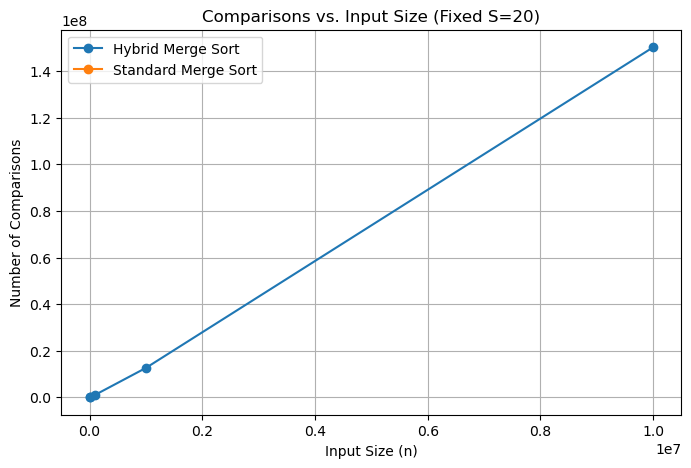

In [22]:
# Plot 1: Comparisons vs. Input Size (Fixed S)
plt.figure(figsize=(8, 5))
df_fixed_S = df[(df["S"] == 20) & (df["algorithm"] == "Hybrid Merge Sort")]
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"], marker='o', linestyle='-', label="Hybrid Merge Sort")
df_standard = df[df["algorithm"] == "Standard Merge Sort"]
plt.plot(df_standard["n"], df_standard["comparisons"], marker='o', linestyle='-', label="Standard Merge Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Number of Comparisons")
plt.title("Comparisons vs. Input Size (Fixed S=20)")
plt.legend()
plt.grid(True)
plt.show()

From the above, it's difficult to see whether the trend follows $\mathcal{O}(n)$ or $\mathcal{O}(n \log n)$. Let's do some additional comparisons to more concretely show its time complexity.

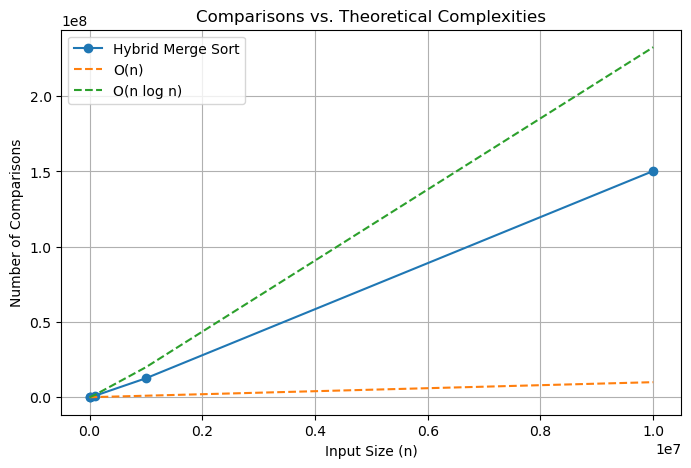

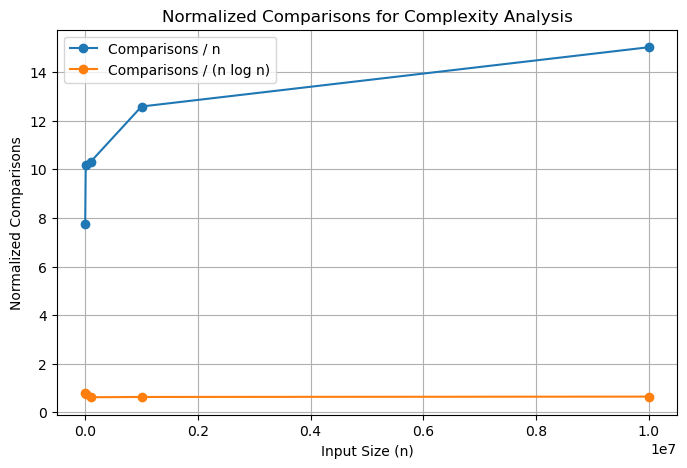

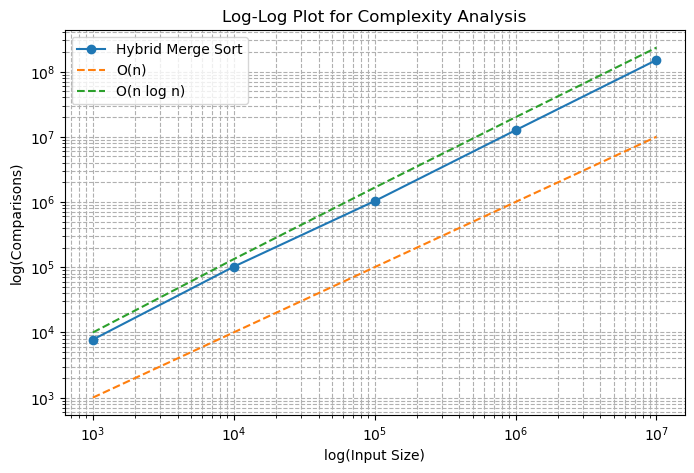

In [23]:
df_fixed_S["n_log_n"] = df_fixed_S["n"] * np.log2(df_fixed_S["n"])

# Plot actual comparisons against n and n log n
plt.figure(figsize=(8, 5))
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"], marker='o', linestyle='-', label="Hybrid Merge Sort")
plt.plot(df_fixed_S["n"], df_fixed_S["n"], linestyle='--', label="O(n)")
plt.plot(df_fixed_S["n"], df_fixed_S["n_log_n"], linestyle='--', label="O(n log n)")

plt.xlabel("Input Size (n)")
plt.ylabel("Number of Comparisons")
plt.title("Comparisons vs. Theoretical Complexities")
plt.legend()
plt.grid(True)
plt.show()

# Normalize and plot the ratios
plt.figure(figsize=(8, 5))
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"] / df_fixed_S["n"], marker='o', label="Comparisons / n")
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"] / df_fixed_S["n_log_n"], marker='o', label="Comparisons / (n log n)")

plt.xlabel("Input Size (n)")
plt.ylabel("Normalized Comparisons")
plt.title("Normalized Comparisons for Complexity Analysis")
plt.legend()
plt.grid(True)
plt.show()

# Log-Log Plot
plt.figure(figsize=(8, 5))
plt.loglog(df_fixed_S["n"], df_fixed_S["comparisons"], marker='o', linestyle='-', label="Hybrid Merge Sort")
plt.loglog(df_fixed_S["n"], df_fixed_S["n"], linestyle='--', label="O(n)")
plt.loglog(df_fixed_S["n"], df_fixed_S["n_log_n"], linestyle='--', label="O(n log n)")

plt.xlabel("log(Input Size)")
plt.ylabel("log(Comparisons)")
plt.title("Log-Log Plot for Complexity Analysis")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

Thus, as seen from above, hybrid sorting algorithm does follow $\mathcal{O}(n \log n)$ complexity, following what we derived

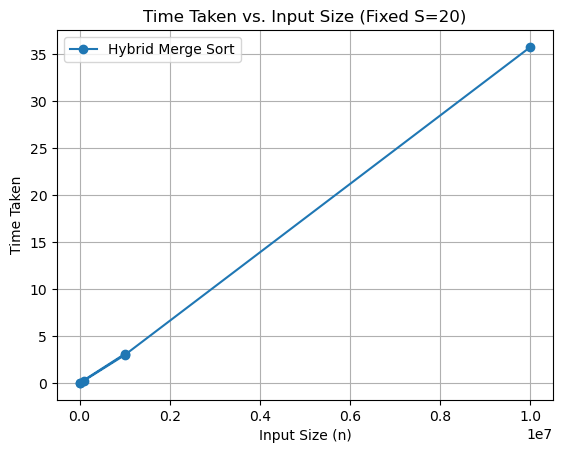

In [15]:
# Plot 2: Time Taken vs. Input Size (Fixed S) 
plt.plot(df_fixed_S["n"], df_fixed_S["time_taken"], marker='o', linestyle='-', label="Hybrid Merge Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Time Taken")
plt.title("Time Taken vs. Input Size (Fixed S=20)")
plt.legend()
plt.grid(True)
plt.show()

### (ii) With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

In [8]:
# Test Hybrid Merge Sort with different S values (fixed n=100000)
fixed_n = 1000000
arr_fixed = np.random.randint(1, 1000000, fixed_n)
np.random.seed(10002)
comparison_data = {"n": [], "S": [], "comparisons": [], "algorithm": [], "time_taken": []}

for S in range(1,51):
    comparison_count = 0
    arr_copy = arr_fixed.copy()
    comparison_data["time_taken"].append(hybrid_merge_sort(arr_copy, 0, fixed_n - 1, S))
    comparison_data["n"].append(fixed_n)
    comparison_data["S"].append(S)
    comparison_data["comparisons"].append(comparison_count)
    comparison_data["algorithm"].append("Hybrid Merge Sort")

# Convert to DataFrame
df = pd.DataFrame(comparison_data)

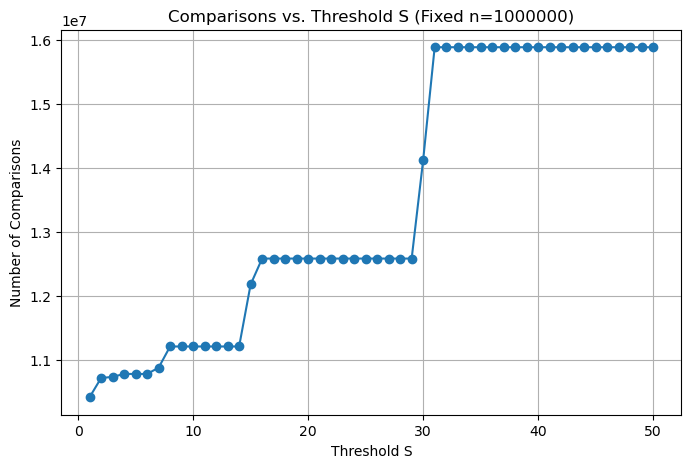

In [9]:
# Plot 2: Comparisons vs. Threshold (Fixed n)
plt.figure(figsize=(8, 5))
df_fixed_n = df[(df["n"] == fixed_n) & (df["algorithm"] == "Hybrid Merge Sort")]
plt.plot(df_fixed_n["S"], df_fixed_n["comparisons"], marker='o', linestyle='-')
plt.xlabel("Threshold S")
plt.ylabel("Number of Comparisons")
plt.title(f"Comparisons vs. Threshold S (Fixed n={fixed_n})")
plt.grid(True)
plt.show()

(Need theoretical info for this first but can see an interesting trend with each plateus doubling in length each time)

### (iii)  Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

From above, we know that the theoretical optimal value for S would be 1 (pure mergesort). However, we know that overhead from recursive function calls can greatly affect the time taken. Thus, we have chosen to check using CPU time to empirically check the optimal value for S.

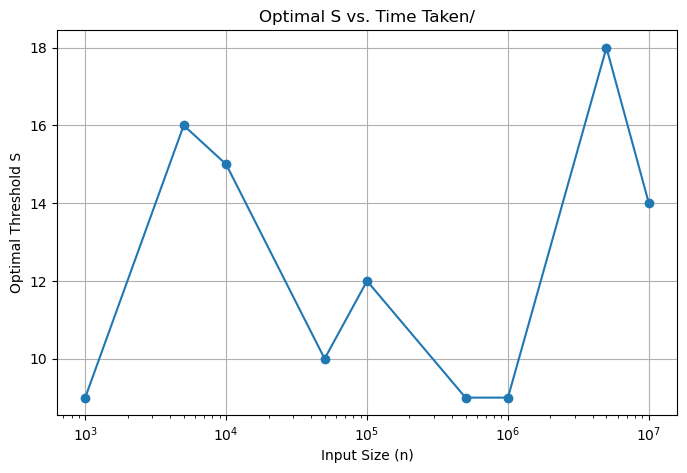

In [26]:
# Experiment setup
input_sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]
optimal_s_values = []
threshold_values = [i for i in range(1, 21)]
max_value = 100000

# Collect data
for n in input_sizes:
    arr_fixed = np.random.randint(1, max_value, n)
    comparison_data = {"S": [], "time_taken": []}

    for S in threshold_values:
        comparison_count = 0
        arr_copy = arr_fixed.copy()
        comparison_data["time_taken"].append(hybrid_merge_sort(arr_copy, 0, n - 1, S))
        comparison_data["S"].append(S)

    df_s = pd.DataFrame(comparison_data)
    optimal_S = df_s.loc[df_s["time_taken"].idxmin(), "S"]
    optimal_s_values.append(optimal_S)

# Plot Optimal S vs Input Size
plt.figure(figsize=(8, 5))
plt.plot(input_sizes, optimal_s_values, marker='o', linestyle='-')
plt.xlabel("Input Size (n)")
plt.ylabel("Optimal Threshold S")
plt.title("Optimal S vs. Time Taken/")
# Since the input values scale exponentially, we use a log scale for easier visualisation
plt.xscale("log")
plt.grid(True)
plt.show()

In [27]:
print(np.array([optimal_s_values]).mean())

12.444444444444445


From the above, we can conclude that on average, 12 should be the optimal S value

## (d) Compare with original Mergesort: 
### Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

In [28]:
# General setup
n = 10000000
arr = np.random.randint(0, 10000000,n)

In [29]:
# Comparison in terms of key comparisons
comparison_count = 0
arr_copy = arr.copy()
mergesort_time = standard_merge_sort(arr_copy, 0, n-1)
mergesort_comparisons = comparison_count

comparison_count = 0
arr_copy = arr.copy()
hybridsort_time = hybrid_merge_sort(arr_copy, 0, n-1, S=14)
hybridsort_comparisons = comparison_count

print(f"Mergesort Key Comparisons: {mergesort_comparisons} comparisons")
print(f"Hybridsort Key Comparisons: {hybridsort_comparisons} comparisons")
print(f"Mergesort Time taken: {mergesort_time}s")
print(f"Hybridsort Time Taken: {hybridsort_time}s")

Mergesort Key Comparisons: 121485124 comparisons
Hybridsort Key Comparisons: 131735814 comparisons
Mergesort Time taken: 39.84903812408447s
Hybridsort Time Taken: 34.51628279685974s


From the above it seems that our initial hypothesis is correct. While mergesort has less comparisons than the hybrid sort, the time saved from avoiding large recursive overheads makes the hybridsort method more efficient in practice, despite the theory disagreeing. 